## Решение задачи Xor при помощи RNN, с использованием MLFLOW

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pickle
import mlflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from mlflow.models import infer_signature
from mlflow.tensorflow import save_model, log_model
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import warnings
from matplotlib.colors import ListedColormap

warnings.filterwarnings("ignore")

In [3]:
mlflow.tensorflow.autolog()
experiment = mlflow.set_experiment("XorRnn")

tf.random.set_seed(1)

## Класс, генерирующий данные, описывающий архитектуру модели и обучающий ее

In [4]:
class XorClassifier:
    def __init__(self, n_input, epochs):
        self.file_path_model = f"models\model_xor_{str(epochs)}_{n_input}.pkl"
        self.data = np.array([
            [0, 0],
            [0, 1],
            [1, 0],
            [1, 1]
        ])
        self.targets = self.generate_target()
        self.n_input = n_input
        self.train_size = 800
        self.epochs = epochs
        self.n_features = 2
        self.batch_size = 1

    def save_model_rnn(self):
        with open(self.file_path_model, 'wb') as f:
            model = self.fit_model_lstm()
            pickle.dump(model, f)

    def generate_target(self) -> ...:
        self.target = np.array([[int(not x1 and x2) or int(not x2 and x1)] for [x1, x2] in self.data])
        return self.target

    def create_model_lstm(self):
        lstm_model = Sequential()
        lstm_model.add(LSTM(100, activation='relu', input_shape=(self.n_input, self.n_features)))
        lstm_model.add(Dense(1, activation='tanh'))
        lstm_model.compile(optimizer='adam', loss='mae')
        return lstm_model

    def fit_model_lstm(self):
        model = self.create_model_lstm()
        print(np.array(self.data.reshape(len(self.targets), 2, 1)).shape, np.array(self.targets.shape))
        model.fit(self.data.reshape(len(self.targets), 1, 2), self.targets.reshape(-1, 1), epochs=self.epochs)
        return model

    def get_predictions(self):
        model = self.load_model()
        predictions = model.predict(self.data.reshape(len(self.targets), 1, 2))
        return predictions

    def load_model(self):
        if not os.path.exists(self.file_path_model):
            self.save_model_rnn()
        elif not os.path.getsize(self.file_path_model) > 0:
            os.remove(self.file_path_model)
            self.save_model_rnn()

        if os.path.getsize(self.file_path_model) > 0:
            with open(self.file_path_model, "rb") as f:
                unpickler = pickle.Unpickler(f)
                model = unpickler.load()
                return model

    def show_result(self):
        predictions = self.get_predictions().transpose()[0]
        plt.title('X1 XOR X2')
        plt.scatter(self.data.transpose()[0][predictions.transpose()>0.5], self.data.transpose()[1][predictions.transpose()>0.5], c='g', label=r'class 1')
        plt.scatter(self.data.transpose()[0][predictions.transpose()<0.5], self.data.transpose()[1][predictions.transpose()<0.5], c='y', label=r'class 0')
        plt.legend(loc='best', fontsize=12)
        plt.grid(True)
        plt.xlabel(r'X1', fontsize=9)
        plt.ylabel(r'X2', fontsize=9)
        plt.show()

    def get_result(self):
        predictions = self.get_predictions()
        model = self.load_model()
        return model, predictions, self.data, self.targets


## Функция для отображения разделяющей гиперплоскости

In [5]:
def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab.reshape(len(ab), 1, 2))
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)

    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)
    plt.show()

## Эксперимент с предсказанием операции XOR с арихитектурой RNN 300 эпох

In [6]:
with mlflow.start_run(run_name='300_epochea'):
    cl = XorClassifier(1, 300)
    model, predictions, data, targets = cl.get_result()

(4, 2, 1) [4 1]
Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.4996
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 0.4990
Epoch 3/300
1/1 [==============================] - 0s 6ms/step - loss: 0.4983
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 0.4976
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 0.4970
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 0.4964
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 0.4957
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 0.4951
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 0.4945
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 0.4939
Epoch 11/300
1/1 [==============================] - 0s 6ms/step - loss: 0.4934
Epoch 12/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4928
Epoch 13/300
1/1 [==========================

INFO:tensorflow:Assets written to: C:\Users\Damir4k\AppData\Local\Temp\tmpilp4re1p\model\data\model\assets


1/1 [==============================] - 0s 115ms/step


319/319 [==============================] - 0s 718us/step


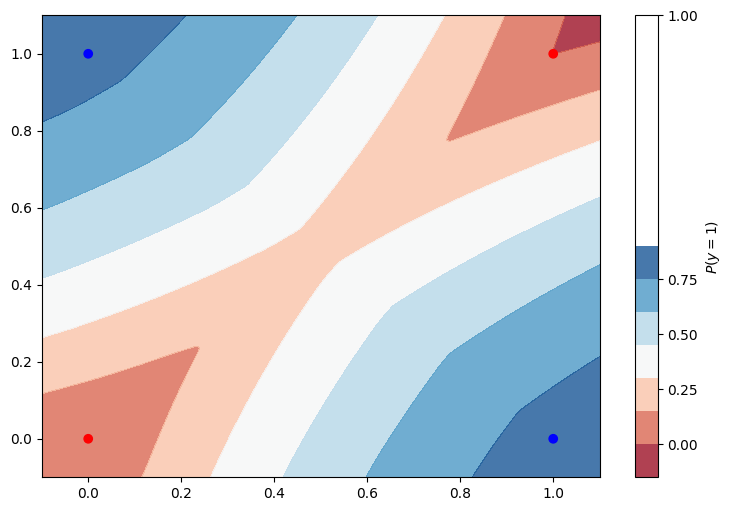

In [7]:
plot_decision_boundary(model.predict, data, np.round(predictions.transpose()[0].tolist()))


## Эксперимент с предсказанием операции XOR с арихитектурой RNN 500 эпох

In [8]:
with mlflow.start_run(run_name='500_epoches'):
    cl = XorClassifier(1, 500)
    model, predictions, data, targets = cl.get_result()

(4, 2, 1) [4 1]
Epoch 1/500
1/1 [==============================] - 1s 955ms/step - loss: 0.4999
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4992
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4984
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4977
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4969
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 0.4963
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4956
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4949
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4942
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4936
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4930
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4924
Epoch 13/500
1/1 [========================

INFO:tensorflow:Assets written to: C:\Users\Damir4k\AppData\Local\Temp\tmpkn3ul_0n\model\data\model\assets


1/1 [==============================] - 0s 116ms/step


319/319 [==============================] - 0s 733us/step


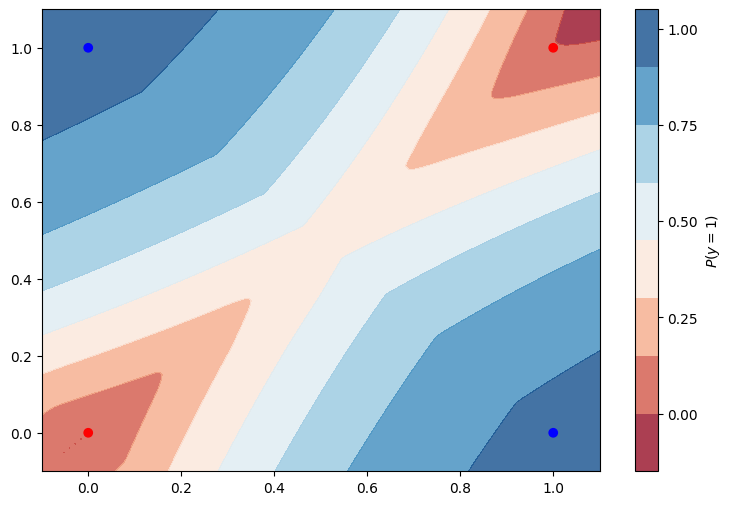

In [9]:
plot_decision_boundary(model.predict, data, np.round(predictions.transpose()[0].tolist()))